In [1]:
###########
# Imports #
###########

# importing libraries
import matplotlib.pyplot as plt
import copy
# importing algorithms
from BFGS_multistart import*
from Stochastic_local_search import*
from Cuadratic_opt_v2 import *
from Scipy_opt_algs import*
from BO_NpScpy import*
# importing test functions
from test_function import*
from utils import *
from COBYQA import *
from ScikitQuant_opt_algs import *
from pySOT_opt_algs import *
from CUATRO import *
from ENTMOOT import *


##########################
# Algorithms & Functions #
##########################

home_dir  = 'images/trajectory_plots_1D_&_tables'

algorithms_test = [
    # LS_QM_v2,
    # opt_SnobFit,
    SRBF,
    PSO_NDCT,
    new_PSO_NDCT,
    DYCORS,
    # opt_SOP,
    COBYLA,
    # COBYQA,
    opt_CUATRO,
    BO,
    ENTMOOT,
    ]

functions_test  = [  #!!! Multimodal before Unimodal!!!
    # 'Levy_f',
    # 'Ackley_f',
    'Rosenbrock_f',
    # 'Antonio_f',
    ]

multim  = ['Levy_f', 'Ackley_f']
unim    = ['Rosenbrock_f', 'Antonio_f']

###########################
# Optimization parameters #
###########################

N_x_l        = [
    2,
    5,
    7,
    ]               # Number of input dimensions

start_       = [5, 10, 15]              # starting points on the trajectory of the algorithm on the test function

reps         = 2                        # We run each algorithm 5 times on each objective function. The number of evaluations per run is given by f_eval_l
f_eval_l     = [
    20,
    30,
    100
    ]  # These are the number of function evaluations (length of trajectory) foreach run in reps. The number depends on the input dimension N_x_l

In [2]:
import pickle

# Open the file in binary mode for reading
with open(r'C:\Users\16941\Desktop\新建文件夹\DDO-4-ChemEng-main\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2025-09-12_15-52-59\trajectories.pkl', 'rb') as file:
    # Load the object from the file
    trajectories1 = pickle.load(file)

# Open the file in binary mode for reading
with open(r'C:\Users\16941\Desktop\新建文件夹\DDO-4-ChemEng-main\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2025-09-12_15-53-11\trajectories.pkl', 'rb') as file:
    # Load the object from the file
    trajectories2 = pickle.load(file)

# Open the file in binary mode for reading
with open(r'C:\Users\16941\Desktop\新建文件夹\DDO-4-ChemEng-main\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2025-09-12_15-53-26\trajectories.pkl', 'rb') as file:
    # Load the object from the file
    trajectories3 = pickle.load(file)

# Open the file in binary mode for reading
with open(r'C:\Users\16941\Desktop\新建文件夹\DDO-4-ChemEng-main\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2025-09-12_15-53-38\trajectories.pkl', 'rb') as file:
    # Load the object from the file
    trajectories4 = pickle.load(file)

# Open the file in binary mode for reading
with open(r'C:\Users\16941\Desktop\新建文件夹\DDO-4-ChemEng-main\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2025-09-12_15-53-50\trajectories.pkl', 'rb') as file:
    # Load the object from the file
    trajectories5 = pickle.load(file)


Make sure to put the algorithms and functions in the correct order!!!

Also the order in which they're to be accessed needs to be correct: Dim, fun, alg, rep

In [3]:
traj1_clean = {}
traj2_clean = {}
traj3_clean = {}
traj4_clean = {}
traj5_clean = {}

for dim in trajectories1.keys():
    traj1_clean[dim]={}
    for func in trajectories1[dim].keys():
        traj1_clean[dim][func]={}
        for alg in trajectories1[dim][func]['f_list'].keys():
            traj1_clean[dim][func][alg]=[]
            for rep in trajectories1[dim][func]['f_list'][alg]:
                traj1_clean[dim][func][alg].append(rep)

for dim in trajectories2.keys():
    traj2_clean[dim]={}
    for func in trajectories2[dim].keys():
        traj2_clean[dim][func]={}
        for alg in trajectories2[dim][func]['f_list'].keys():
            traj2_clean[dim][func][alg]=[]
            for rep in trajectories2[dim][func]['f_list'][alg]:
                traj2_clean[dim][func][alg].append(rep)

for dim in trajectories3.keys():
    traj3_clean[dim]={}
    for func in trajectories3[dim].keys():
        traj3_clean[dim][func]={}
        for alg in trajectories3[dim][func]['f_list'].keys():
            traj3_clean[dim][func][alg]=[]
            for rep in trajectories3[dim][func]['f_list'][alg]:
                traj3_clean[dim][func][alg].append(rep)

for dim in trajectories4.keys():
    traj4_clean[dim]={}
    for func in trajectories4[dim].keys():
        traj4_clean[dim][func]={}
        for alg in trajectories4[dim][func]['f_list'].keys():
            traj4_clean[dim][func][alg]=[]
            for rep in trajectories4[dim][func]['f_list'][alg]:
                traj4_clean[dim][func][alg].append(rep)
            
for dim in trajectories5.keys():
    traj5_clean[dim]={}
    for func in trajectories5[dim].keys():
        traj5_clean[dim][func]={}
        for alg in trajectories5[dim][func]['f_list'].keys():
            traj5_clean[dim][func][alg]=[]
            for rep in trajectories5[dim][func]['f_list'][alg]:
                traj5_clean[dim][func][alg].append(rep)


In [4]:
def merge_dicts(dict1, dict2):

    merge_dicts = {}

    for dim in dict1:
        if dim in dict2:
            merge_dicts[dim]={}
            for func in dict1[dim]:
                if func in dict2[dim]:
                    merge_dicts[dim][func]={}
                    for alg in dict1[dim][func]:
                        if alg in dict2[dim][func]:
                            merge_dicts[dim][func][alg] = dict1[dim][func][alg] + dict2[dim][func][alg]
    return merge_dicts

In [5]:
traj_list = [
    traj1_clean,
    traj2_clean,
    traj3_clean,
    traj4_clean,
    traj5_clean
]

In [6]:
merge12 = merge_dicts(traj1_clean, traj2_clean)
merge123 = merge_dicts(merge12, traj3_clean)
merge1234 = merge_dicts(merge123, traj4_clean)
merge12345 = merge_dicts(merge1234, traj5_clean)

### get minimum list 

In [7]:
def min_list(dict):
    
    min_dict = {}

    for dim in dict:

        min_dict[dim] = {}

        for func in dict[dim]:

            min_dict[dim][func] = {}

            for alg in dict[dim][func]:

                min_dict[dim][func][alg] = []
                
                for traj_nr in range(len(dict[dim][func][alg])):

                    # restructure to best-so-far
                    min_dict[dim][func][alg].append([min(dict[dim][func][alg][traj_nr][:i]) for i in range(1,len(dict[dim][func][alg][traj_nr]))])
                    
                    if dim == 'D2':

                        n_p = 20

                        # get last element
                        b_last = copy.deepcopy(min_dict[dim][func][alg][traj_nr][:n_p])[-1]

                        # pad or truncate
                        min_dict[dim][func][alg][traj_nr] = copy.deepcopy(min_dict[dim][func][alg][traj_nr][:n_p]) + [b_last]*(n_p - len(min_dict[dim][func][alg][traj_nr][:n_p]))

                    elif dim == 'D5':

                        n_p = 50

                        # get last element
                        b_last = copy.deepcopy(min_dict[dim][func][alg][traj_nr][:n_p])[-1]

                        # pad or truncate
                        min_dict[dim][func][alg][traj_nr] = copy.deepcopy(min_dict[dim][func][alg][traj_nr][:n_p]) + [b_last]*(n_p - len(min_dict[dim][func][alg][traj_nr][:n_p]))

                    elif dim == 'D7':

                        n_p = 100

                        # get last element
                        b_last = copy.deepcopy(min_dict[dim][func][alg][traj_nr][:n_p])[-1]

                        # pad or truncate
                        min_dict[dim][func][alg][traj_nr] = copy.deepcopy(min_dict[dim][func][alg][traj_nr][:n_p]) + [b_last]*(n_p - len(min_dict[dim][func][alg][traj_nr][:n_p]))

            
    return min_dict

In [8]:
merge_min = min_list(merge12345)

### re-create trajectories

In [9]:
from datetime import datetime

def recreate_traj(dict, alg_list, SafeData = False):

    timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

    alg_list_string = [i.__name__ for i in alg_list]

    for dim in dict:

        for func in dict[dim]:

            all_f_= []
            dict[dim][func]['all means'] = {}
            dict[dim][func]['all 90']    = {}
            dict[dim][func]['all 10']    = {}

            for alg in dict[dim][func]:
                    
                if alg in alg_list_string:
                    
                    l_ = np.array(dict[dim][func][alg])
                    m_ = np.mean(l_, axis=0)

                    q10_ = np.quantile(l_, 0.10, axis=0)
                    q90_ = np.quantile(l_, 0.90, axis=0)
                    dict[dim][func]['all means'][alg] = copy.deepcopy(m_)
                    dict[dim][func]['all 90'][alg]    = copy.deepcopy(q10_)
                    dict[dim][func]['all 10'][alg]    = copy.deepcopy(q90_)
                    all_f_.append(copy.deepcopy(l_))

            dict[dim][func]['mean']   = np.mean(all_f_, axis=(0,1))
            dict[dim][func]['median'] = np.median(all_f_, axis=(0,1))
            dict[dim][func]['q 0']    = np.max(all_f_, axis=(0,1))
            dict[dim][func]['q 100']  = np.min(all_f_, axis=(0,1))

    if SafeData == True: save_dict(home_dir, dict, timestamp)

    return dict, timestamp


In [10]:
trajectories, timestamp = recreate_traj(merge_min, algorithms_test, SafeData= True)

In [11]:
array = ML4CE_uncon_table(trajectories,algorithms_test,functions_test, multim, N_x_l, start_)

==   SRBF  ==
==   PSO_NDCT  ==
==   new_PSO_NDCT  ==
==   DYCORS  ==
==   COBYLA  ==
==   opt_CUATRO  ==
==   BO  ==
==   ENTMOOT  ==
==   SRBF  ==
==   PSO_NDCT  ==
==   new_PSO_NDCT  ==
==   DYCORS  ==
==   COBYLA  ==
==   opt_CUATRO  ==
==   BO  ==
==   ENTMOOT  ==
==   SRBF  ==
==   PSO_NDCT  ==
==   new_PSO_NDCT  ==
==   DYCORS  ==
==   COBYLA  ==
==   opt_CUATRO  ==
==   BO  ==
==   ENTMOOT  ==


d:\anaconda\envs\chemeng\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\anaconda\envs\chemeng\Lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [12]:
ML4CE_uncon_table_plot(array, functions_test, algorithms_test, N_x_l, home_dir, timestamp, SafeFig = True)

The directory 'images/trajectory_plots_1D_&_tables\2025-09-12_15-55-39\tables' does not exist in the root directory. Creating directory.


The directory 'images/trajectory_plots_1D_&_tables\2025-09-12_15-55-39\trajectory_plots_1D' does not exist in the root directory.


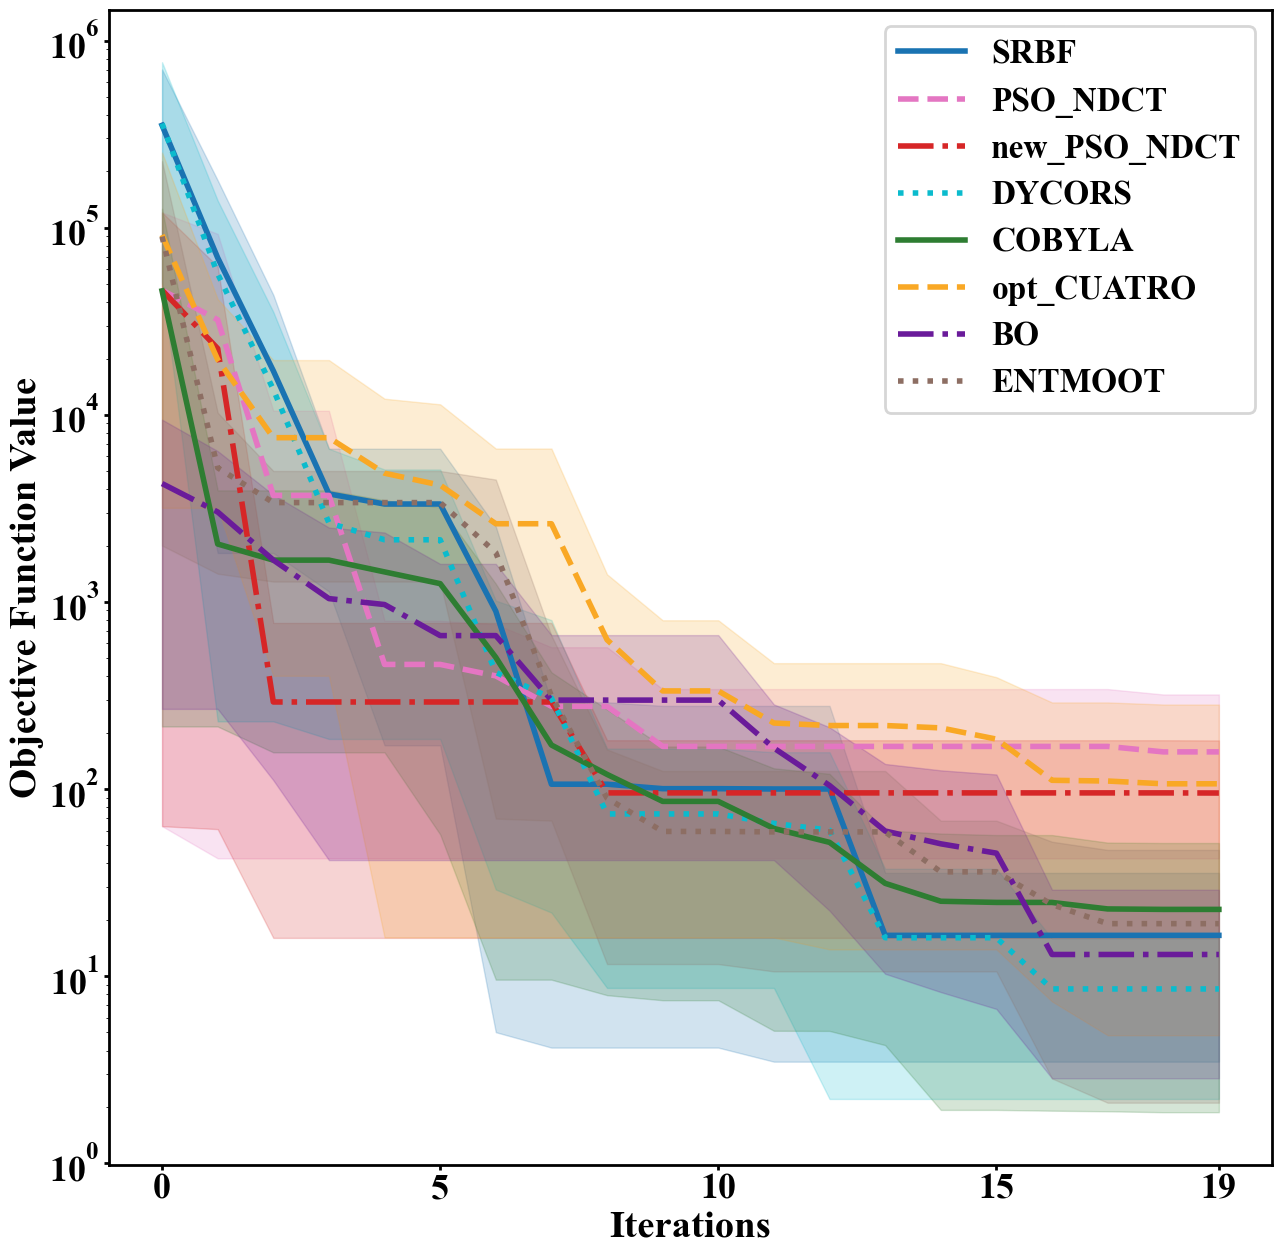

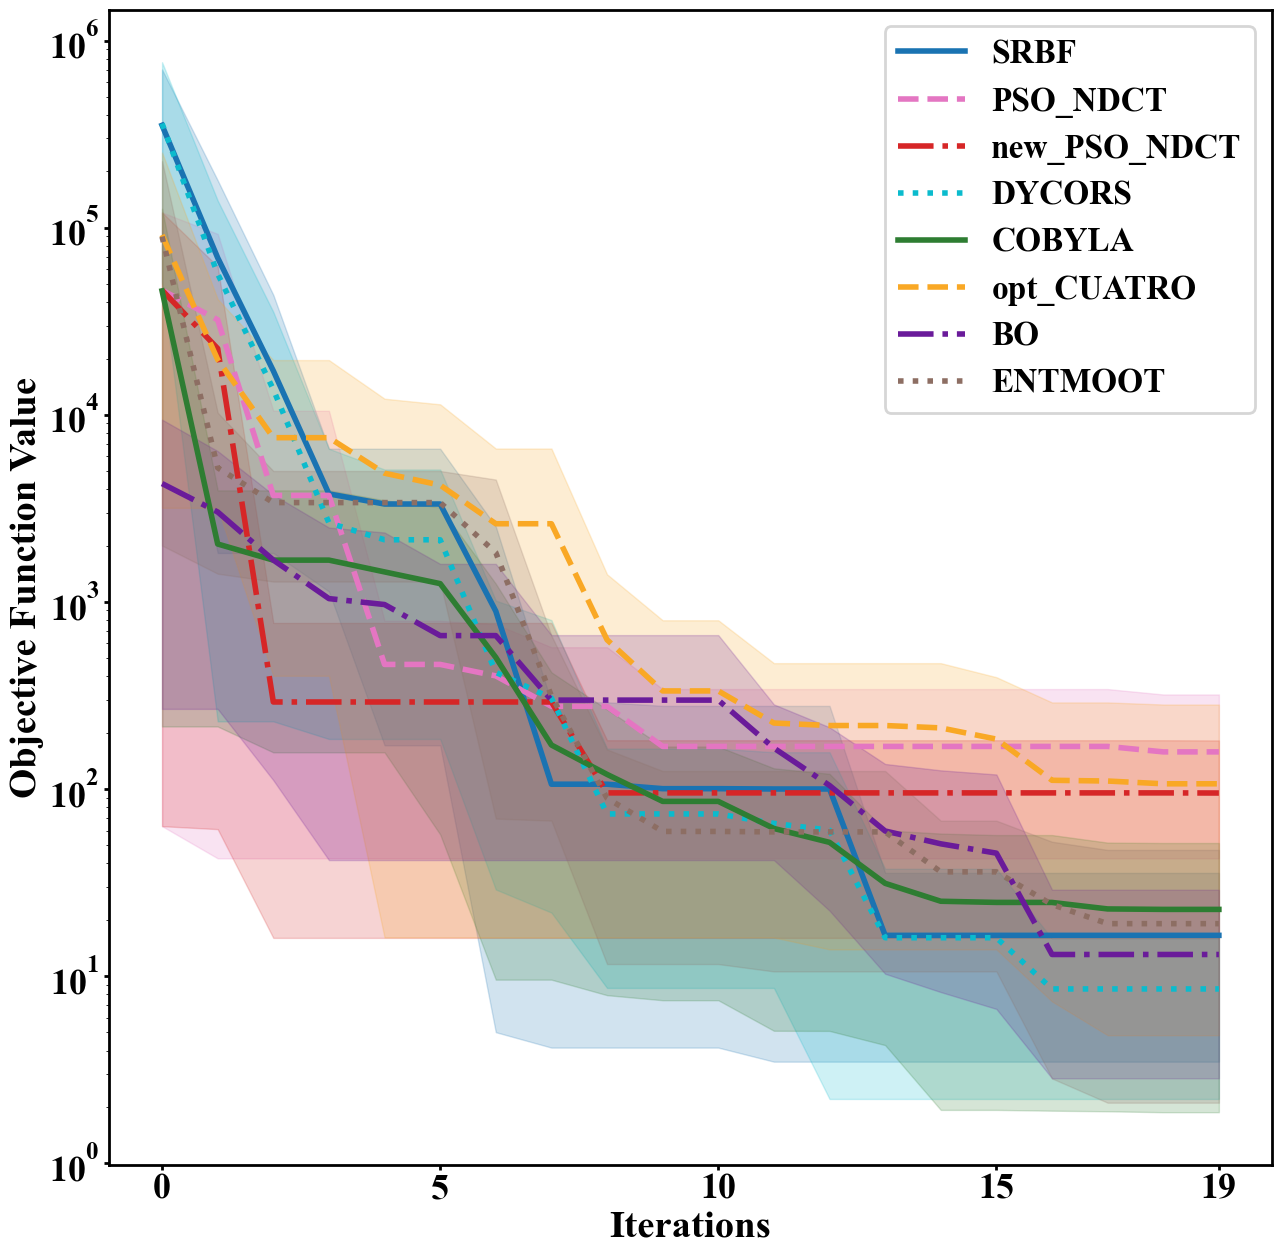

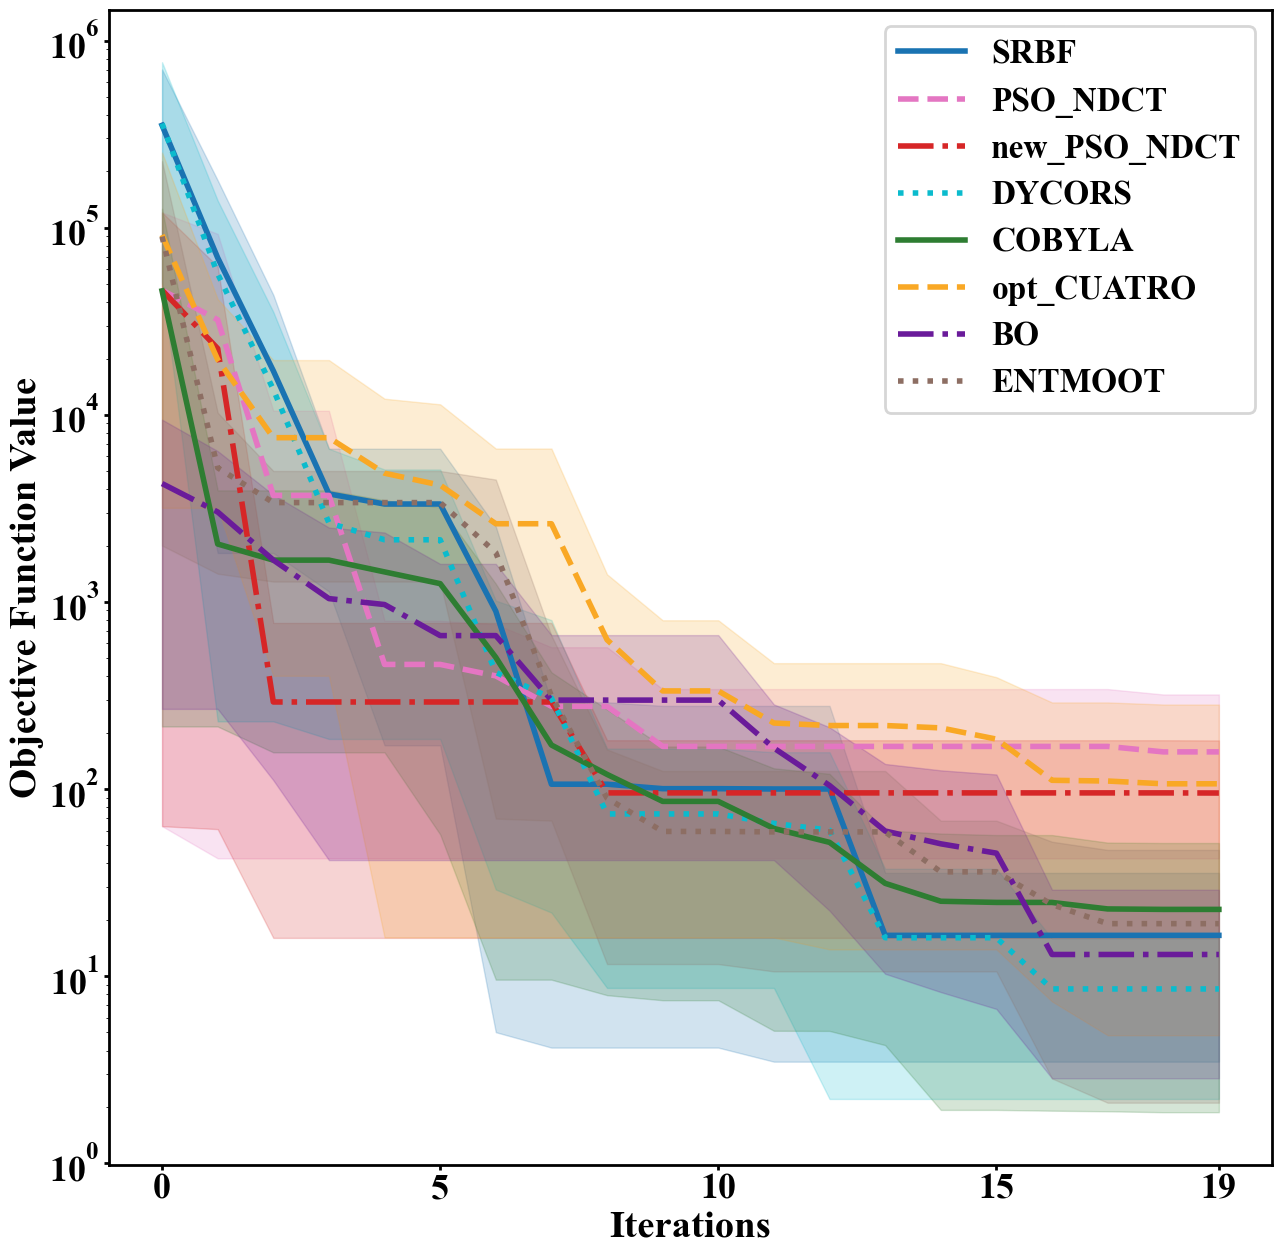

In [13]:
ML4CE_uncon_graph_abs(trajectories, algorithms_test, functions_test, N_x_l, home_dir, timestamp, SafeFig=True)